In [1]:
import tlsh

In [2]:
a_hash = tlsh.oldhash(open('a.out','rb').read())
b_hash = tlsh.oldhash(open('b.out','rb').read())
c_hash = tlsh.oldhash(open('k5.out','rb').read())

print("="*72)
print(a_hash)
print(b_hash)
print(c_hash)

x_com_new = ''
y_com_new = ''

for i in range(len(a_hash)):
    if a_hash[i] == b_hash[i]:
        x_com_new += ' '
        y_com_new += ' '
    else:
        x_com_new += a_hash[i]
        y_com_new += b_hash[i]
        
print("="*72)
print("A v/s B\n")
print(x_com_new)
print(y_com_new, "\n")
print("Diff A v/s B:", tlsh.diff(a_hash, b_hash))
print("="*72)

x_com_new = ''
y_com_new = ''

for i in range(len(a_hash)):
    if b_hash[i] == c_hash[i]:
        x_com_new += ' '
        y_com_new += ' '
    else:
        x_com_new += b_hash[i]
        y_com_new += c_hash[i]
        
print("="*72)
print("B v/s C\n")
print(x_com_new)
print(y_com_new, "\n")
print("Diff B v/s C:", tlsh.diff(b_hash, c_hash))
print("="*72)

x_com_new = ''
y_com_new = ''

for i in range(len(a_hash)):
    if a_hash[i] == c_hash[i]:
        x_com_new += ' '
        y_com_new += ' '
    else:
        x_com_new += a_hash[i]
        y_com_new += c_hash[i]
        
print("="*72)
print("A v/s C\n")
print(x_com_new)
print(y_com_new, "\n")
print("Diff A v/s C:", tlsh.diff(a_hash, c_hash))
print("="*72)

F062D006E7A0DF7ECC6C537C44AB0B3463B6E878176253232A04F6711E83B949E579DA
B562C107B7A0DE7ADC6C437C046B0B3063B6E87816A253231B04F6711E83B949E679DA
8D626242B7B08DFECC644338409B473162FBAC215AA1526B3794B7312EA3B54DD17ACB
A v/s B

F0  D0 6E    F EC   5   4 A    4         76     2A               5    
B5  C1 7B    E AD   4   0 6    0         6A     1B               6     

Diff A v/s B: 18
B v/s C

B5  C107  A DE7AD  C  7C046 0B 0 3B6E87816 2 3231B0 F67 1 8  9 9E6 9DA
8D  6242  B 8DFEC  4  38409 47 1 2FBAC215A 1 26B379 B73 2 A  5 DD1 ACB 

Diff B v/s C: 122
A v/s C

F0  D006E A DF7    C5 7C 4A 0B 4 3B6E8781762 3232A0 F67 1 8  9 9E5 9DA
8D  6242B B 8DF    44 38 09 47 1 2FBAC215AA1 26B379 B73 2 A  5 DD1 ACB 

Diff A v/s C: 146


In [3]:
import random
import numpy

string_1 = '43142311232423214343224212413331334234344322414443'
string_2 = '43142311232423214343224212413331334234344322414443'

s1_hash = tlsh.oldhash(string_1.encode())
s2_hash = tlsh.oldhash(string_2.encode())

def get_block_idxs(str_len: int):
    
    dist = 0
    while dist == 0:
        idx_1 = random.randint(0,str_len-1)
        dist = abs(numpy.random.normal(str_len/10, 3))//1
    
    idx_2 = int(idx_1 + dist)
    if(idx_2 > 49):
        idx_2 = 49
        
    return (idx_1, idx_2)
    
def reverse_block(block: tuple, inp_str: str):
    idx_1 = block[0]
    idx_2 = block[1]
    
    if(idx_1 != 0):
        ret_str = inp_str[0:idx_1] + " " + inp_str[idx_2:idx_1-1: -1] + " " + inp_str[idx_2+1::]
        
        print(inp_str[0:idx_1] + " " + inp_str[idx_1: idx_2] + " " + inp_str[idx_2::])
        print(ret_str)
        return ret_str
    else:
        return inp_str[idx_2: 0: -1] + inp_str[0] + inp_str[idx_2:-1]

block = get_block_idxs(50)
rev_block = reverse_block(block, string_1)

print(string_1)
# print(rev_block)

# '01234567'[0:4] + '01234567'[6:3:-1]

431423112 32423 214343224212413331334234344322414443
431423112 232423 14343224212413331334234344322414443
43142311232423214343224212413331334234344322414443


In [4]:
def find_diff_string(st_1: str, st_2: str):
    diff_str = ''
    for i in range(len(st_1)):
        if(st_1[i] == st_2[i]):
            diff_str += ' '
        else:
            diff_str += 'D'
    return diff_str

In [5]:
def get_block_array(string: str, n_chars: int):
#     blocks_count = [0,0,0,0]
    
#     for _ in range(len(blocks_count)):
        
#         b_size = 0
#         for i in range(len(inp_str)):
#             test_char = inp_str[i]
            
#             for j in range(i+1, len(inp_str)):
#                 if inp_str[j] == test_char:
#                     b_size += 1
#                     continue
#                 else:
#                     blocks_count[b_size] += 1
                    
    array = [[0 for _ in range(len(string))] for _ in range(n_chars)]
    
    i = 0
    while i < len(string):
        j = i + 1
        while j < len(string) and string[i] == string[j]:
            j += 1
        array[int(string[i]) - 1][j - i - 1] += 1
        i = j

    return array

In [6]:
def get_randomness(inp_str: str):
    
    str_length = len(inp_str)
    
    freq_dict = {}
    for char in inp_str:
        if(not char in freq_dict):
            freq_dict[char] = 1
        else:
            freq_dict[char] += 1
    
    prob_dict = {}
    for chars in freq_dict:
        prob_dict[char] = freq_dict[char]/str_length
    
    shannon_entropy = 0
    for char in prob_dict:
        shannon_entropy += prob_dict[char]*math.log10(prob_dict[char])
    
    block_array = get_block_array(inp_str, 4)
    normalizer = 1
    
#     normalizer_dict = {1: 0, 2: 0.5/28, 3: 0.5/10, 4: 0.5/3.2, 5: 0.5/0.5, 6: 0.5/0.25} # 5 and 6 skewed
    normalizer_dict = {1: 0, 2: 0.5/28, 3: 0.5/10, 4: 0.5/3.2, 5: 0.5/0.5, 6: 0.5/0.25}
    for row in block_array:
#         print(row)
        for i in range(len(row)):
            block_len = i + 1
            if(block_len <= 5):
                normalizer += normalizer_dict[block_len]*row[i]
    
#     normalizer = 100*normalizer/str_length #ENABLE THIS LATER?????
    
    print(normalizer)
    return shannon_entropy*normalizer

# % contrib, block size (contrib per char, sum contrib in string)

# FOR 50 LENGTH STRING
# 57% 1 sized (28.56 -> 28.56)
# 28% 2 sized (7 -> 14)
# 10.2% 3 sized (1.7 -> 5.1)
# 3.2% 4 sized (0.408 -> 1.632)
# 0.02% 5 sized (0.025 -> 0.01)
# 0.04% (0.006 -> 0.024)

#########DEBUG###############
# a = get_rnd_string_and_hash()
# print(a[0])
# get_randomness(a[0])

In [7]:
import random 
import tlsh 
import binascii
import math

def get_rnd_string_and_hash():
    my_string = "1234"
    slots = 50
    # a_pad = 'a'*1000
    new_string = ''
    binary_representation = bytes()

    for j in range(slots):
        new_string = new_string + random.choice(my_string)

    binary_representation = new_string.encode()
    secret_hashed = tlsh.oldhash(binary_representation)
#     print(new_string)

    #####################################################
    # TRY
    # new_string = a_pad + new_string + a_pad
    # binary_representation = new_string.encode()

    # secret_hashed_2 = tlsh.oldhash(binary_representation)
    # print(new_string)
    return (new_string, secret_hashed)
    #####################################################

    # print(tlsh.diff(secret_hashed, secret_hashed_2))

In [10]:
import csv
def get_matches_below_thr(threshold: int, secret_hashed: str, strings_file: str):
    
    diff_n = 0
    num = 0

    list_of_matches = []
    with open(strings_file, newline='') as csvfile:
        reader_obj = csv.reader(csvfile, delimiter=',', quotechar='|')

        for row in reader_obj:
            if((not secret_hashed == 'TNULL')
               and (not row[1] == 'TNULL')):
                diff_n = tlsh.diff(secret_hashed, row[1])
                if(diff_n < threshold):
                    num += 1
                    list_of_matches.append(row[0])
#                     print(row[0])
#                     print(new_string)
#                     diff_string = ''
#                     for i in range(len(new_string)):
#                         if(new_string[i] == row[0][i]):
#                             diff_string += ' '
#                         else:
#                             diff_string += 'D'
#                     print(diff_string)
#                     print(diff_n)
#                     print("="*100)

    return (num, list_of_matches)

In [81]:
# !!!!!! DEBUG !!!!!!!

import numpy as np
str_and_hash = get_rnd_string_and_hash()
secret_string = str_and_hash[0]
secret_hash = str_and_hash[1]

print(secret_string, "- NOT VISIBLE TO PLAYER")
print(secret_hash)

# print(get_randomness(secret_string))

##################################################
# for string in matches[1]:
#     print(string)
#     print(find_diff_string(secret_string, string))
#     print(get_randomness(string))
#     print('='*50)
##################################################

21332424134234234134221233242334444344133414331111 - NOT VISIBLE TO PLAYER
CF900200B00A780018C1C2D273074A1DB30509072C14001B051A035201AD40CE805004


In [100]:
matches = get_matches_below_thr(80, secret_hash, 'string_hashing.txt')

In [133]:
diff_array = np.zeros((len(matches[1]), len(matches[1])))
for i in range(len(matches[1])):
    for j in range(i, len(matches[1])):
        b1 = matches[1][i].encode()
        b2 = matches[1][j].encode()
        diff_array[i][j] = tlsh.diff(tlsh.oldhash(b1), tlsh.oldhash(b2))

diff_vector = np.zeros(len(matches[1]))
for i in range(len(matches[1])):
    b1 = matches[1][i].encode()
    b2 = secret_string.encode()
    diff_vector[i] = tlsh.diff(tlsh.oldhash(b1), tlsh.oldhash(b2))

print("Diff array:\n", diff_array, "\n")
print("Diff vector:\n", diff_vector.T, "\n")
print("Shape of diff_array: ", np.shape(diff_array))
print('='*80)

eligible_parents_check = []

for i in range(len(matches[1])):
    for j in range(i, len(matches[1])):
        if(diff_array[i][j] > diff_vector[i] or diff_array[i][j] > diff_vector[j]):
            eligible_parents_check.append((secret_string, matches[1][i], matches[1][j], i, j))

# print(eligible_parents_check)
str_idxs_and_sims = []

for ss, p1, p2, i, j in eligible_parents_check:
    if(not p1 == p2):
        a = find_diff_string(ss, p1)
        print(a, "- NOT VISIBLE TO PLAYER")
        b = find_diff_string(ss, p2)
        print(b, "- NOT VISIBLE TO PLAYER")
        c = find_diff_string(p1, p2)
        print(c)
        
        count_of_spaces = [0,0,0]
        for idx in range(len(a)):
            if(a[idx] == ' '):
                count_of_spaces[0] += 1
            if(b[idx] == ' '):
                count_of_spaces[1] += 1
            if(c[idx] == ' '):
                count_of_spaces[2] += 1
#         print(count_of_spaces)
        print()
        print("Difference in secret string and p1: ", diff_vector[i])
        print("Difference in secret string and p2: ", diff_vector[j])
        print("Difference in two parents is: ", diff_array[i][j])
        print("Characterwise similarity - p1 & secret string:", count_of_spaces[0], "- NOT VISIBLE TO PLAYER")
        print("Characterwise similarity - p2 & secret string:", count_of_spaces[1], "- NOT VISIBLE TO PLAYER")
        print("Characterwise similarity - p1 & p2:", count_of_spaces[2])
        print('='*80)
        str_idxs_and_sims.append(((i,j),tuple(count_of_spaces), (diff_vector[i], diff_vector[j], diff_array[i][j])))

Diff array:
 [[  0. 100.  83. ...  90.  84.  90.]
 [  0.   0. 100. ... 102. 114. 117.]
 [  0.   0.   0. ...  94.  89.  97.]
 ...
 [  0.   0.   0. ...   0.  87.  66.]
 [  0.   0.   0. ...   0.   0.  92.]
 [  0.   0.   0. ...   0.   0.   0.]] 

Diff vector:
 [75. 77. 74. 78. 78. 79. 79. 78. 71. 74. 79. 77. 79. 74. 76. 79. 79. 79.
 69. 77. 75. 79. 79. 79. 71. 79. 78. 75. 78. 79. 79. 73. 75. 78. 77. 75.
 77.] 

Shape of diff_array:  (37, 37)
  DDDD  DD DD DD D DDDDDDDDDD  DD  DDD DDDD   DDDD - NOT VISIBLE TO PLAYER
DDDDDDD  DDDDDD DDDDD   DD   DDD     DDD DDDDDDDDD - NOT VISIBLE TO PLAYER
DD D  D D DDDDDDDDDDDDDD  DDDDDDD  DD DDD DDDDDDD 

Difference in secret string and p1:  75.0
Difference in secret string and p2:  77.0
Difference in two parents is:  100.0
Characterwise similarity - p1 & secret string: 16 - NOT VISIBLE TO PLAYER
Characterwise similarity - p2 & secret string: 15 - NOT VISIBLE TO PLAYER
Characterwise similarity - p1 & p2: 12
  DDDD  DD DD DD D DDDDDDDDDD  DD  DDD DDDD   DD

In [233]:
###################
# elem -> (index p1, index p2), (simil p1 & s, simil p2 & s, simil p1 & p2), (diff ss & p1, diff ss & p2)
# Want to maximize similarity between p1 & s, p2 & s, while minimizing between p1 & p2
# Minimizing, can be done directly
# Maximizing, ??? - Minimizing difference?
###################

def key_for_pvp_sim(element):
    return element[1][2]

sorted_sias = sorted(str_idxs_and_sims, key=key_for_pvp_sim)
# sorted_sias

pvp_similarity_upper_bound = 6
pvs_diff_upper_bound = 100

for elem in sorted_sias:
    idx = sorted_sias.index(elem)
    if(
    elem[1][2] > pvp_similarity_upper_bound or
    (elem[2][1] > pvs_diff_upper_bound or
    elem[2][2] > pvs_diff_upper_bound)):
        sorted_sias[idx] = 0
        
while(1):    
    try:
        (sorted_sias.index(0))
        sorted_sias.pop(sorted_sias.index(0))
    except:
        break
        
sorted_sias

[((23, 33), (16, 12, 4), (79.0, 78.0, 96.0)),
 ((3, 10), (6, 17, 6), (78.0, 79.0, 85.0)),
 ((3, 19), (6, 23, 6), (78.0, 77.0, 92.0)),
 ((3, 33), (6, 12, 6), (78.0, 78.0, 87.0)),
 ((8, 10), (20, 17, 6), (71.0, 79.0, 94.0)),
 ((19, 20), (23, 13, 6), (77.0, 75.0, 92.0)),
 ((32, 33), (21, 12, 6), (75.0, 78.0, 99.0))]

In [162]:
import csv

n_train = 1000
threshold = 60

def rand_vs_match():
    rand_vs_match = {}
    freq_rvm = {}
    
    for _ in range(n_train):
        str_and_hash = get_rnd_string_and_hash()
        secret_string = str_and_hash[0]
        secret_hash = str_and_hash[1]
        
        print(secret_string)
#         print(secret_hash)
        
        matches = get_matches_below_thr(threshold, secret_hash, 'string_hashing.txt')
        randomness = get_randomness(secret_string)
        
        randomness = int((-1+randomness)*20)
        
        if randomness in rand_vs_match:
            freq_rvm[randomness] += 1
            rand_vs_match[randomness] += matches[0]
        else:
            freq_rvm[randomness] = 1
            rand_vs_match[randomness] = matches[0]
    
    avg_rvm = {}
    for key in rand_vs_match:
        avg_rvm[key] = rand_vs_match[key]/freq_rvm[key]
    return avg_rvm

#         print(num_of_match[1])
#         print(matches[0])
#         print()
#         for string in matches[1]:
#             print(string)
#             print(find_diff_string(string, secret_string))
#             print("="*50)

In [163]:
rand_vs_match_dict = rand_vs_match()

22421332334342133124231341341122214332114411232312
1.2107142857142856
21444414334242143122423421441444134242432114413312
1.3133928571428573
42133132222122113223422244443141312412432231142342
1.4696428571428573
34313312344324124244121222321214413112331321114313
1.2071428571428573
43312432232221221243214413114142232224122244113242
1.292857142857143
31113142131111114222441112314314343311111242443222
2.2535714285714286
13131213113421344111434243242131424313113112313331
1.1714285714285715
11121344432213141322342443111211432231131443412331
1.2928571428571431
22233312231222314431232322231411322331121411133423
1.3750000000000004
14313223444433214343222411413214211242322213323442
1.3633928571428573
41234442231322221132231343332441434143222424424241
1.3955357142857145
22421414432223342233413342341432231334111242113323
1.2785714285714285
13221314131133142331433113144223412142142131424413
1.160714285714286
32211134142313313332334323241334114213431413231124
1.2071428571428573
1443332143224334311134

2.1714285714285717
43342213234431444444221122232211323344214421412432
1.2285714285714289
23143123324412131431244321232123312212442144212332
1.1428571428571428
11323343323213223241343213331324222234234342121313
1.2776785714285714
41213232243123323433333443213423423311423233243241
2.107142857142857
34242212423214331131224332124411433133423444224131
1.2285714285714286
22434314243241322114442332344433144241221322344131
1.260714285714286
41334121433411221333124444434233141242224241322112
2.2250000000000005
32433431242431114433232243412422232214214141112421
1.2392857142857145
34113344421233122241143232331314323143422224141313
1.3455357142857145
24112443431342244222414243213223133124141234123142
1.1571428571428573
22441423441242323211341322213224241324312132321222
1.1892857142857145
11424123113134441142444224422224134113241434122241
1.4133928571428571
23144424434444111342411241232132414244434144234411
1.3955357142857145
43243222211414323233231332233231232121221232224112
1.3312500000000003
443

1.175
31213144341434413331131332141142133141141432412433
1.192857142857143
42233432443241414224344314123211424243333331221221
1.1428571428571428
24343312124412431141231322132332424221433441113224
1.2107142857142859
21433413234241332322331121242133334421223111132214
1.4553571428571428
21323111214444111243313242433144244134414122434211
1.38125
41444233443414333313241143331421322342243344341333
1.4312500000000004
31212243124242121123313312242424111212431114331443
1.225
32223214312343311324444244141144411231231224424141
1.38125
22414131144341232312114144424231224211312123332233
1.2428571428571429
24413112342221311311134431221413344442122431442124
1.399107142857143
13334412231132332441313334322332333312131444432432
1.5375000000000003
11342431422411441112442411241322314141331311244143
1.2285714285714286
42432234424122123323421431241244223134424333211431
1.1928571428571428
24132133442223141111412313433443144343442113143231
1.33125
43443334212231323424421222432224321411423224212133
1.257142857

1.242857142857143
34311424341243222122422233241112413231424233334214
1.3598214285714285
23342241123241122313312324443431213233133343211133
1.2928571428571431
11224214344321444112314312232242341221132122413344
1.2464285714285714
33312413432323331213121432231313424341311141224123
1.185714285714286
31213214134121421144411123213112331334324131222324
1.2214285714285718
22111112141234113143133442122232214443142331431431
2.2071428571428564
11344224323142131112124234414132432423311222123432
1.2071428571428573
24113111233432131311111431341441412143232214414431
2.157142857142857
13422321422413133322113242421434334422233321342244
1.292857142857143
42432211333131334224123112241214131334221331212234
1.2285714285714286
43241123231311323334433244421324211443323123434411
1.260714285714286
23413243322421324113411243221411424411431112441213
1.2107142857142859
31443144224222123443423132442241242314221242421214
1.175
34414324241231133131444414433341233323434244313121
1.3455357142857143
1311124311411433234

1.2107142857142856
23343244212314224144234344244414422343334322142442
1.2607142857142857
11111212131123411212324112431213334334323121211112
2.2776785714285714
12213412321421331124343244214431123123424433142331
1.1607142857142858
32133112134211434322332114232124434122341224213211
1.1785714285714286
32224431314142441433221243434434213322314343422341
1.192857142857143
44321232414142344234411112431113124441122333112434
1.4133928571428573
42223443242241113131222114133133341214324331242311
1.3071428571428574
11124311213242444413431133432342313433214341342431
1.2776785714285717
11211131242131241314334223113441212131141234144323
1.175
33321434142122443133422411122234414123221111224213
1.4312500000000001
21214314112242131331433133442212444343132322144121
1.2107142857142859
44413421331413144314244244132324242442321332422423
1.175
43421241321131341422342322112424413134211322333111
1.225
21232223112223341442234432111413414433124142324122
1.2928571428571431
13121134134214324241122123412132111331442

1.1571428571428573
13344344314321234114111343443111423144331332142241
1.2607142857142857
34122221111223314114421123341243214112313334133144
1.5232142857142859
24333212341442223221112112433322444122422321221144
1.410714285714286
11413421432124144443422314342441324231212341124242
1.2276785714285714
41222334431342422134221111233441114434422141241223
1.4348214285714287
14111213342121423141432233423224324424122142242244
1.2107142857142859
42213434313233311442224444113321122422242214123124
1.449107142857143
23122244411244414441141444121142132344414124244224
1.3892857142857142
13131234442314424421333443143213144413344424311443
1.307142857142857
33214243213133142332333443122213423324232241421314
1.207142857142857
11443244142331443222322144221141312421311234322132
1.2464285714285714
32311124214341434121323143321243323133341243434423
1.1535714285714287
22314344244344132221232321121222441222411443334332
1.3607142857142858
14124231231241411111121222321424244141142234143112
1.1214285714285714
13122

1.341964285714286
24242341422331143231344434424113342424442411341231
1.225
42333323144344224424143424314313124413144444124144
2.2633928571428568
31442233312421334112431411422224343344422324242414
1.3812500000000003
42132443232344132214233214142312121413231423341423
1.0892857142857144
11211344422114242131221333324421234322342214123444
1.3991071428571429
12321332132233134422142412311442434211422213332133
1.2607142857142861
34124241311213441313144321212441442441221413423413
1.1249999999999998
11313341324444222244243434222424222111144443443223
1.8142857142857143
23344231423411321211112413142112221423331134211232
1.363392857142857
32434342232342313343111134421422243123144233342213
1.3455357142857145
41231134411411441314421321443414142432233112132422
1.1964285714285714
31112443342111441233114121331424343234442214413333
1.449107142857143
32344312423332211144231334413444214234314412144314
1.275
22321124313214414332433233431341414124312332323214
1.1249999999999998
224322234342332411233321311211

1.2642857142857142
33221144241322223143121212244131423132112411124244
1.349107142857143
24213342433111421414333321344244322322231344444432
1.3455357142857145
43111321441332434212114242311342431432212323242244
1.1750000000000003
42234341124233311134132234332234311324121144221122
1.2964285714285713
42132133434312233314113424443313133341333344132341
1.3955357142857143
23312444331243333211241242341212441422111343444213
1.3955357142857143
43144324414133214314111423242242241123332114321344
1.242857142857143
12314212422311231411241133411323241314141242342212
1.125
44413222432331214113113133321131422244443244313444
1.4955357142857144
14341411442421123123212343331213424111433224114413
1.225
11412323132134122131321134224214343433122114324214
1.125
42211312131314134244434443221412133143443411143414
1.2392857142857143
24124332213214323242441444332123214141212311322443
1.1750000000000003
34422123421443212411242143431323234233243312323111
1.1571428571428573
223221313322244432413242311312212324422243

2.1214285714285714
14124412433133244133334242322114324132134142313341
1.28125
33113443413124223432232143113243413114444224323313
1.3169642857142858
34112412332314214134341244131341342433333222211134
2.259821428571428
42321213121143334131432423234332222133344121212114
1.3276785714285715
42131343421224442414424121222443122324134233241442
1.2071428571428573
22342114223243211441141243231334121332314132221411
1.2107142857142859
13114243244222214133242222313121432344213311234124
1.4196428571428574
13344342313421132224244243434421423132414214414242
1.157142857142857
24432443413231433311414423444123422134114143223321
1.242857142857143
41324241212441312224142111334211424312421311441422
1.2071428571428573
44231234124141344212114411314332342233132442331441
1.1964285714285714
21331433321314412223244413431242224313331432141231
1.2857142857142858
11412241312322234431421322424222313131214344331134
1.2250000000000003
14243414343344121314243324234113441332231134442331
1.2107142857142859
412322314343432

In [164]:
def compare_rvm(tup_1):
    return tup_1[0]

# print(rand_vs_match_dict)
rand_vs_match_tuples = []
for key in rand_vs_match_dict:
    rand_vs_match_tuples.append((key, rand_vs_match_dict[key]))

rand_vs_match_tuples
rand_vs_match_tuples = sorted(rand_vs_match_tuples, key=compare_rvm)
print(rand_vs_match_tuples)

[(-30, 0.0), (-29, 0.0), (-28, 0.0), (-27, 0.1111111111111111), (-26, 0.21818181818181817), (-25, 0.3333333333333333), (-24, 0.2052980132450331), (-23, 0.12947189097103917), (-22, 0.25)]


[-30, -29, -28, -27, -26, -25, -24, -23, -22]
[0.0, 0.0, 0.0, 0.1111111111111111, 0.21818181818181817, 0.3333333333333333, 0.2052980132450331, 0.12947189097103917, 0.25]
[       -inf        -inf        -inf -2.19722458 -1.52242654 -1.09861229
 -1.58329263 -2.04429148 -1.38629436]


/tmp/ipykernel_53486/2088844611.py:12: RuntimeWarning: divide by zero encountered in log
  print(np.log(m))
/tmp/ipykernel_53486/2088844611.py:14: RuntimeWarning: divide by zero encountered in log
  plt.scatter(r,np.log(m))


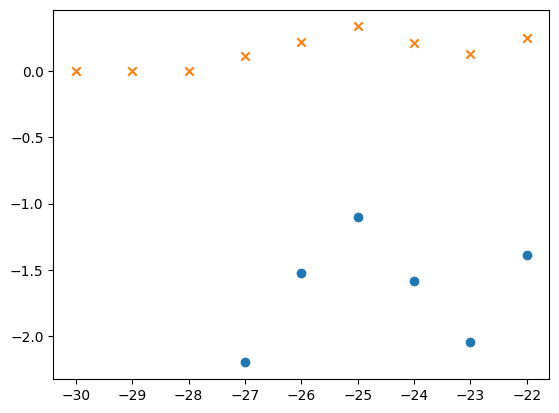

In [165]:
import numpy as np
import matplotlib.pyplot as plt

r = []
m = []
for x, y in rand_vs_match_tuples:
    r.append(x)
    m.append(y)

print(r)
print(m)
print(np.log(m))

plt.scatter(r,np.log(m))
plt.scatter(r,m, marker='x')
plt.show()